In [1]:
# Import Modules
import pandas as pd
import os
import json
import requests
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
#import yfinance as yf
from pathlib import Path
import sqlalchemy as sql
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
load_dotenv("./SAMPLE.env")

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
tickers = ["RYT","XSW","XLK","USRT","XLRE","RWR","BBUS","JMOM","SPMD","MDYG","SLY","SLYG"]
timeframe = "1D"
start_date = pd.Timestamp("2020-10-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-10-01", tz="America/New_York").isoformat()

In [6]:
df_hist_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

df_hist_data

BBUS                                    JMOM  \
                            open     high     low  close volume     open   
time                                                                       
2020-10-01 00:00:00-04:00  61.71  61.8000  61.300  61.50   8904  35.0000   
2020-10-02 00:00:00-04:00  60.64  61.3100  60.640  61.08  42334  34.3500   
2020-10-05 00:00:00-04:00  61.47  62.1067  61.470  62.09  16083  35.0900   
2020-10-06 00:00:00-04:00  62.16  62.5000  61.230  61.25  20449  35.5500   
2020-10-07 00:00:00-04:00  61.86  62.4400  61.860  62.35  13343  35.5500   
...                          ...      ...     ...    ...    ...      ...   
2021-09-27 00:00:00-04:00  81.32  81.5200  81.121  81.27  36219  45.6400   
2021-09-28 00:00:00-04:00  80.67  80.6900  79.480  79.56  27047  44.8045   
2021-09-29 00:00:00-04:00  79.79  80.1200  79.590  79.62  32278  44.6000   
2021-09-30 00:00:00-04:00  79.94  80.0300  78.720  78.72  25225  44.5657   
2021-10-01 00:00:00-04:00  79.09  79.9350  78.490  79.56  39710  43.8800   

                                                             ...   XLRE  \
                              high      low    close volume  ...   open   
time                                                         ...          
2020-10-01 00:00:00-04:00  35.0800  34.9000  35.0050  27594  ...  35.40   
2020-10-02 00:00:00-04:00  34.9224  34.3500  34.8095  29669  ...  35.31   
2020-10-05 00:00:00-04:00  35.3900  35.0200  35.3900   5588  ...  36.53   
2020-10-06 00:00:00-04:00  35.6896  35.0150  35.0800  11887  ...  36.73   
2020-10-07 00:00:00-04:00  35.7610  35.5200  35.7300   9855  ...  36.56   
...                            ...      ...      ...    ...  ...    ...   
2021-09-27 00:00:00-04:00  45.7372  45.4256  45.5600  21543  ...  45.92   
2021-09-28 00:00:00-04:00  44.8045  44.3100  44.4535   6618  ...  44.87   
2021-09-29 00:00:00-04:00  44.6000  44.2656  44.2900   6517  ...  45.06   
2021-09-30 00:00:00-04:00  44.5657  43.9200  43.9206   6891  ...  45.38   
2021-10-01 00:00:00-04:00  44.3500  43.4901  44.2500  14330  ...  44.79   

                                                                 XSW  \
                             high     low  close    volume      open   
time                                                                   
2020-10-01 00:00:00-04:00  35.860  35.170  35.84   4962889  120.9200   
2020-10-02 00:00:00-04:00  36.540  35.290  36.42   3838875  119.3100   
2020-10-05 00:00:00-04:00  36.680  35.885  36.63   2047649  121.0000   
2020-10-06 00:00:00-04:00  36.830  36.190  36.33   3378579  123.2466   
2020-10-07 00:00:00-04:00  36.655  36.290  36.42   1947082  123.6100   
...                           ...     ...    ...       ...       ...   
2021-09-27 00:00:00-04:00  46.140  45.105  45.13   6621245  178.3900   
2021-09-28 00:00:00-04:00  45.080  44.530  44.87  11755550  175.8000   
2021-09-29 00:00:00-04:00  45.380  45.000  45.18   5669530  172.9800   
2021-09-30 00:00:00-04:00  45.395  44.450  44.47   5820243  172.3700   
2021-10-01 00:00:00-04:00  45.250  44.400  44.93   8033142  172.6500   

                                                                
                               high       low    close  volume  
time                                                            
2020-10-01 00:00:00-04:00  121.9500  120.2300  121.720   31329  
2020-10-02 00:00:00-04:00  121.2700  118.8500  120.110   36845  
2020-10-05 00:00:00-04:00  122.2400  121.0000  122.240   31858  
2020-10-06 00:00:00-04:00  125.1590  122.3750  122.375   32121  
2020-10-07 00:00:00-04:00  124.7396  123.4300  124.660   15615  
...                             ...       ...      ...     ...  
2021-09-27 00:00:00-04:00  178.9400  176.6798  177.980  193398  
2021-09-28 00:00:00-04:00  175.8000  172.1200  172.120    9133  
2021-09-29 00:00:00-04:00  173.4700  171.7800  171.800    8595  
2021-09-30 00:00:00-04:00  173.2700  171.4448  171.630   13834  
2021-10-01 00:00:00-04:00  174.9300  171.3850  174.620    

In [7]:
df_hist_data.head()

BBUS                                 JMOM  \
                            open     high    low  close volume   open   
time                                                                    
2020-10-01 00:00:00-04:00  61.71  61.8000  61.30  61.50   8904  35.00   
2020-10-02 00:00:00-04:00  60.64  61.3100  60.64  61.08  42334  34.35   
2020-10-05 00:00:00-04:00  61.47  62.1067  61.47  62.09  16083  35.09   
2020-10-06 00:00:00-04:00  62.16  62.5000  61.23  61.25  20449  35.55   
2020-10-07 00:00:00-04:00  61.86  62.4400  61.86  62.35  13343  35.55   

                                                            ...   XLRE  \
                              high     low    close volume  ...   open   
time                                                        ...          
2020-10-01 00:00:00-04:00  35.0800  34.900  35.0050  27594  ...  35.40   
2020-10-02 00:00:00-04:00  34.9224  34.350  34.8095  29669  ...  35.31   
2020-10-05 00:00:00-04:00  35.3900  35.020  35.3900   5588  ...  36.53   
2020-10-06 00:00:00-04:00  35.6896  35.015  35.0800  11887  ...  36.73   
2020-10-07 00:00:00-04:00  35.7610  35.520  35.7300   9855  ...  36.56   

                                                                XSW            \
                             high     low  close   volume      open      high   
time                                                                            
2020-10-01 00:00:00-04:00  35.860  35.170  35.84  4962889  120.9200  121.9500   
2020-10-02 00:00:00-04:00  36.540  35.290  36.42  3838875  119.3100  121.2700   
2020-10-05 00:00:00-04:00  36.680  35.885  36.63  2047649  121.0000  122.2400   
2020-10-06 00:00:00-04:00  36.830  36.190  36.33  3378579  123.2466  125.1590   
2020-10-07 00:00:00-04:00  36.655  36.290  36.42  1947082  123.6100  124.7396   

                                                    
                               low    close volume  
time                                                
2020-10-01 00:00:00-04:00  120.230  121.720  31329  
2020-10-02 00:00:00-04:00  118.850  120.110  36845  
2020-10-05 00:00:00-04:00  121.000  122.240  31858  
2020-10-06 00:00:00-04:00  122.375  122.375  32121  
2020-10-07 00:00:00-04:00  123.430  124.660  15615  

[5 rows x 60 columns]

In [8]:
df_hist_data.tail()

BBUS                                   JMOM  \
                            open    high     low  close volume     open   
time                                                                      
2021-09-27 00:00:00-04:00  81.32  81.520  81.121  81.27  36219  45.6400   
2021-09-28 00:00:00-04:00  80.67  80.690  79.480  79.56  27047  44.8045   
2021-09-29 00:00:00-04:00  79.79  80.120  79.590  79.62  32278  44.6000   
2021-09-30 00:00:00-04:00  79.94  80.030  78.720  78.72  25225  44.5657   
2021-10-01 00:00:00-04:00  79.09  79.935  78.490  79.56  39710  43.8800   

                                                             ...   XLRE  \
                              high      low    close volume  ...   open   
time                                                         ...          
2021-09-27 00:00:00-04:00  45.7372  45.4256  45.5600  21543  ...  45.92   
2021-09-28 00:00:00-04:00  44.8045  44.3100  44.4535   6618  ...  44.87   
2021-09-29 00:00:00-04:00  44.6000  44.2656  44.2900   6517  ...  45.06   
2021-09-30 00:00:00-04:00  44.5657  43.9200  43.9206   6891  ...  45.38   
2021-10-01 00:00:00-04:00  44.3500  43.4901  44.2500  14330  ...  44.79   

                                                               XSW          \
                             high     low  close    volume    open    high   
time                                                                         
2021-09-27 00:00:00-04:00  46.140  45.105  45.13   6621245  178.39  178.94   
2021-09-28 00:00:00-04:00  45.080  44.530  44.87  11755550  175.80  175.80   
2021-09-29 00:00:00-04:00  45.380  45.000  45.18   5669530  172.98  173.47   
2021-09-30 00:00:00-04:00  45.395  44.450  44.47   5820243  172.37  173.27   
2021-10-01 00:00:00-04:00  45.250  44.400  44.93   8033142  172.65  174.93   

                                                     
                                low   close  volume  
time                                                 
2021-09-27 00:00:00-04:00  176.6798  177.98  193398  
2021-09-28 00:00:00-04:00  172.1200  172.12    9133  
2021-09-29 00:00:00-04:00  171.7800  171.80    8595  
2021-09-30 00:00:00-04:00  171.4448  171.63   13834  
2021-10-01 00:00:00-04:00  171.3850  174.62    6558  

[5 rows x 60 columns]

In [13]:
def performance_forecast(etf_df):
        
    # Compute MC for current etf
    MC_30yrs = MCSimulation(
        portfolio_data = etf_df,
        num_simulation = 500,
        num_trading_days = 252*30)
    # Do MC
    MC_30yrs.plot_simulation()
    

                            BBUS                               
                            open     high     low  close volume
time                                                           
2020-10-01 00:00:00-04:00  61.71  61.8000  61.300  61.50   8904
2020-10-02 00:00:00-04:00  60.64  61.3100  60.640  61.08  42334
2020-10-05 00:00:00-04:00  61.47  62.1067  61.470  62.09  16083
2020-10-06 00:00:00-04:00  62.16  62.5000  61.230  61.25  20449
2020-10-07 00:00:00-04:00  61.86  62.4400  61.860  62.35  13343
...                          ...      ...     ...    ...    ...
2021-09-27 00:00:00-04:00  81.32  81.5200  81.121  81.27  36219
2021-09-28 00:00:00-04:00  80.67  80.6900  79.480  79.56  27047
2021-09-29 00:00:00-04:00  79.79  80.1200  79.590  79.62  32278
2021-09-30 00:00:00-04:00  79.94  80.0300  78.720  78.72  25225
2021-10-01 00:00:00-04:00  79.09  79.9350  78.490  79.56  39710

[253 rows x 5 columns]
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 1

/Users/mingluli/Documents/cu-virt-fin-pt-09-2021-u-b-main/Project_Dashboard/MCForecastTools.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

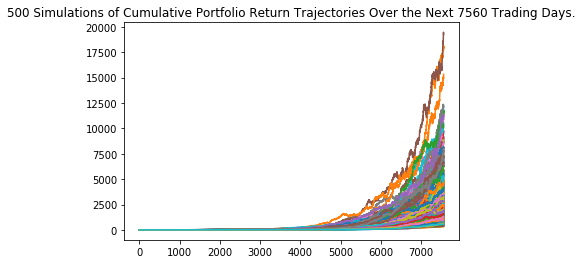

In [14]:
# Load etf list from csv
csv_path = Path('./Resources/etf_list.csv')
etf_list = pd.read_csv(csv_path)['etf']

# Loop over etf list and compute MC for each etf
for i in range(len(etf_list)):
    current_etf = etf_list[i]
    etf_df = df_hist_data.loc[:,[current_etf]]
    # Do MC
    performance_forecast(etf_df)
    
# KENS_df from Ken
# performance_forecast(KENS_df)
    